# Data Collection and Preparation

In [14]:
# Importing libraries for data analysis, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [31]:
# Loading the dataset
file_path = (r'C:\Users\hadex\Desktop\hamzah\boston.csv')

# Displaying the first few rows of the dataset
print("First 20 rows of the dataset:")
data.head(20)

First 20 rows of the dataset:


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RM*LSTAT,CHAS_1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,32.74350,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,58.68794,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,28.95555,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,20.57412,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,38.09351,0
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7,33.50030,0
6,0.08829,12.5,7.87,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9,74.72916,0
7,0.14455,12.5,7.87,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1,118.19380,0
8,0.21124,12.5,7.87,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5,168.53583,0
9,0.17004,12.5,7.87,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9,102.66840,0


In [17]:
# Checking for missing values in the dataset
print("\nMissing values in each column:")
print(data.isnull().sum())

# Handling the missing values by filling them with the column mean (if any)
data.fillna(data.mean(), inplace=True)
print("\nMissing values after imputation:")
print(data.isnull().sum())

# Overview of the dataset
print("\nDataset Information:")
data.info()


Missing values in each column:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Missing values after imputation:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  

# Exploratory Data Analysis(EDA)


In [18]:
# Geting a statistical summary of the numerical features
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std  

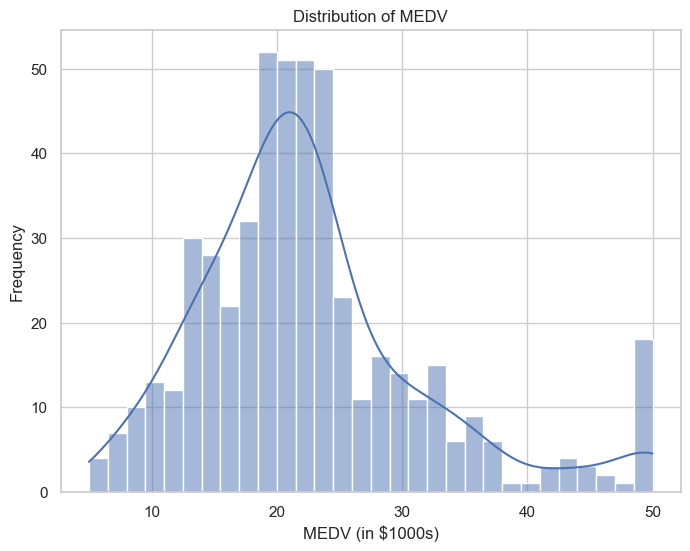

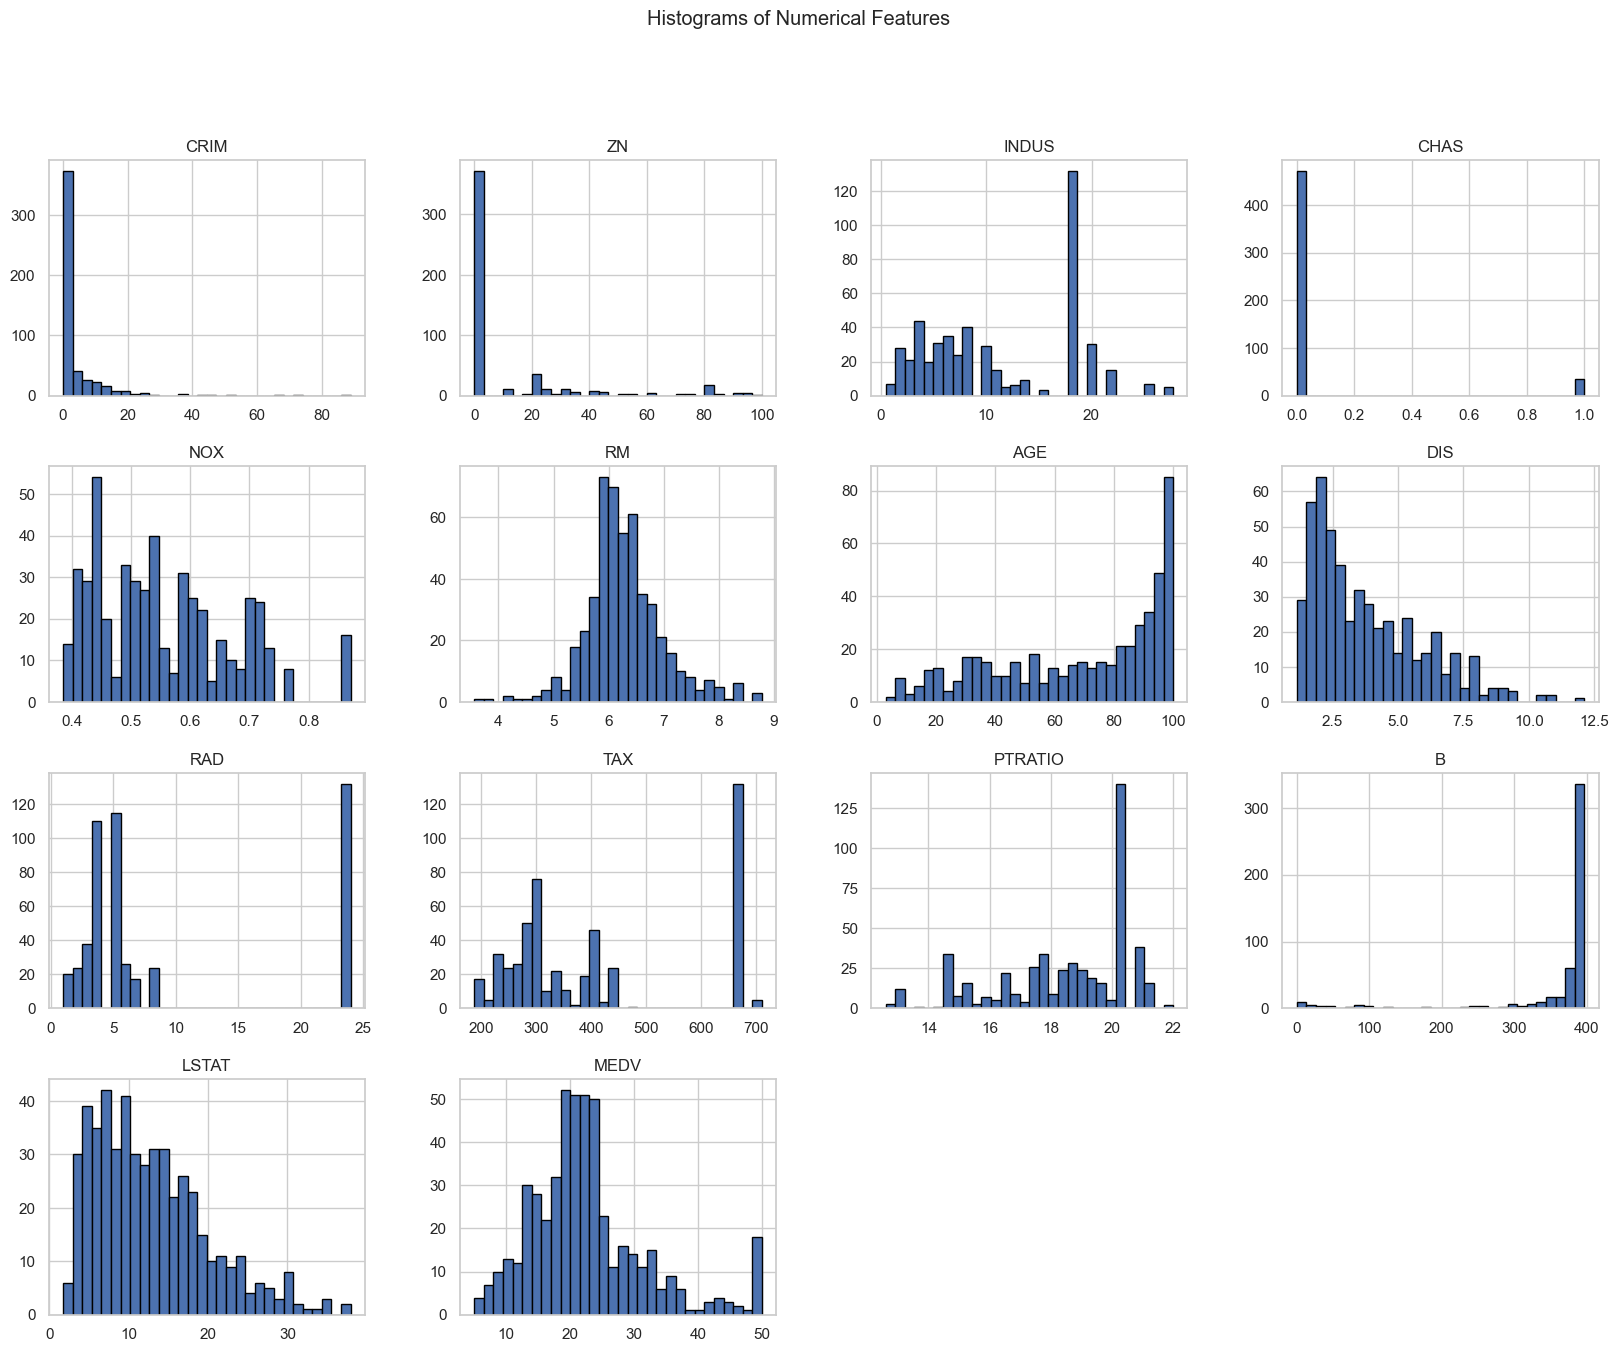

In [19]:
#Visualizing Feature Distributions
# Distribution of the target variable (MEDV)
plt.figure(figsize=(8, 6))
sns.histplot(data['MEDV'], kde=True, bins=30)
plt.title('Distribution of MEDV')
plt.xlabel('MEDV (in $1000s)')
plt.ylabel('Frequency')
plt.show()

# Distribution of each numerical feature
data.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

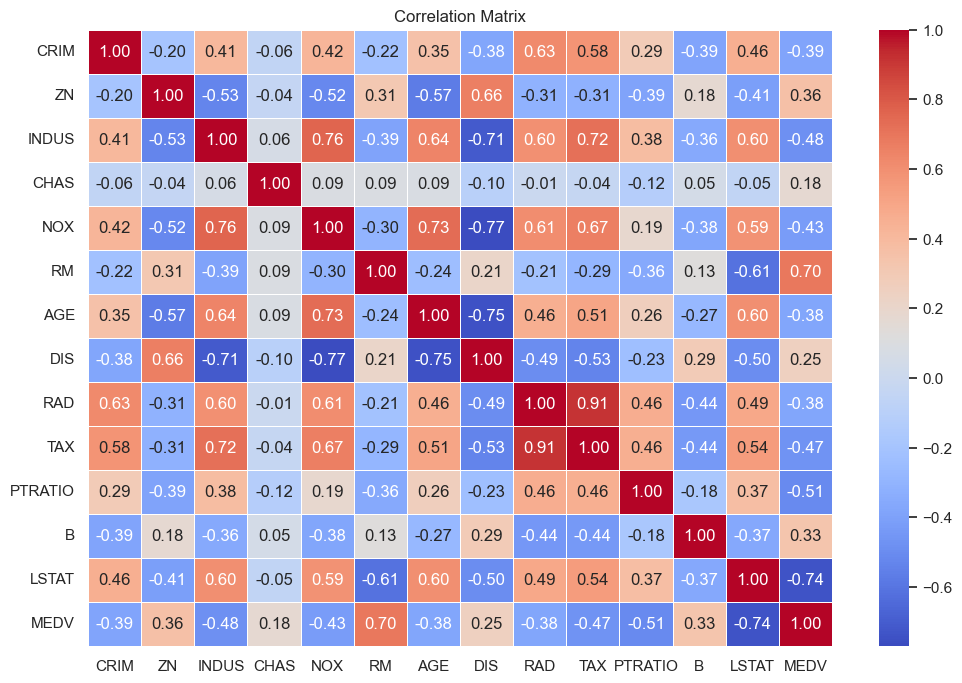

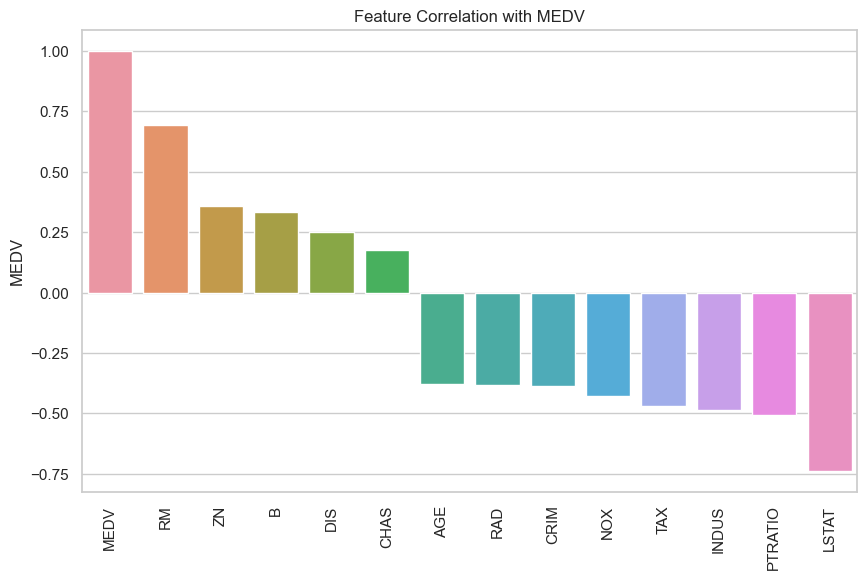

In [20]:
#correlation analysis
# Generating a correlation matrix to identify relationships between features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Bar plot of correlations with the target variable (MEDV)
plt.figure(figsize=(10, 6))
correlation_with_target = data.corr()['MEDV'].sort_values(ascending=False)
sns.barplot(x=correlation_with_target.index, y=correlation_with_target)
plt.xticks(rotation=90)
plt.title('Feature Correlation with MEDV')
plt.show()


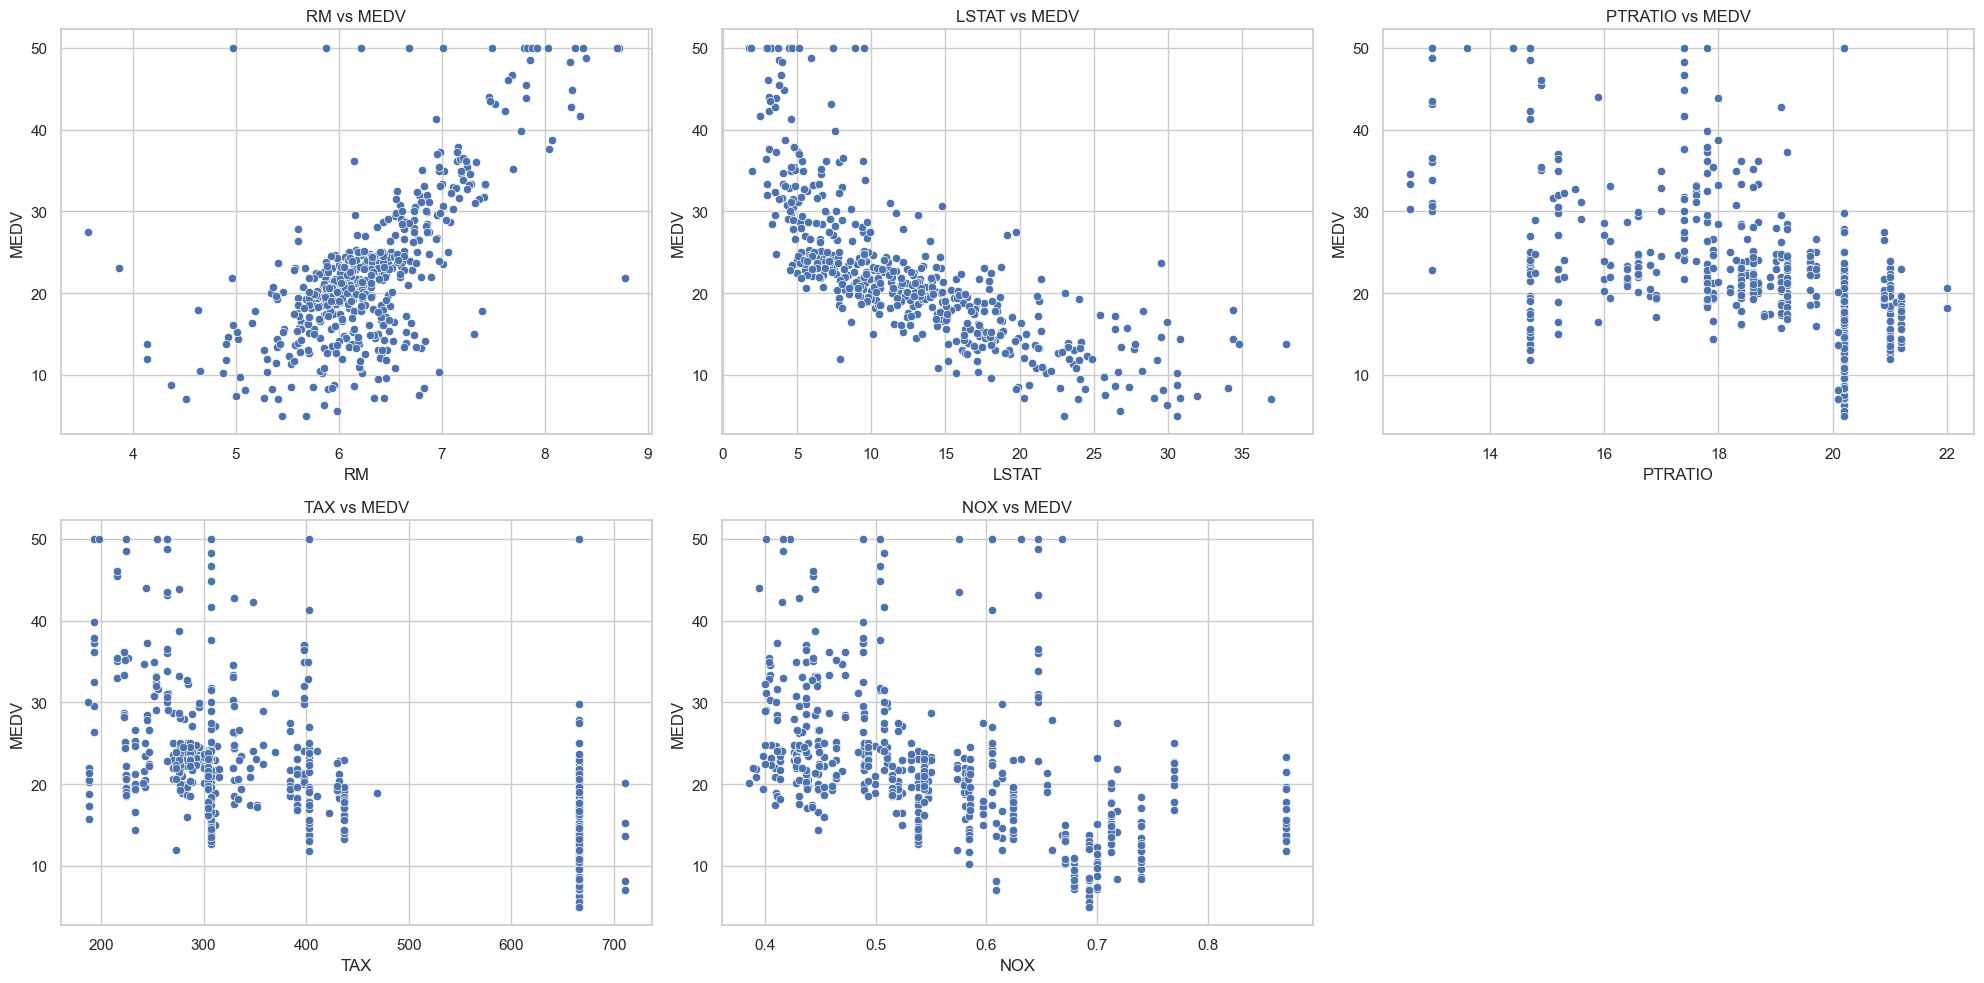

In [21]:
# Scatter plots to explore relationships between selected features and the target variable (MEDV)
selected_features = ['RM', 'LSTAT', 'PTRATIO', 'TAX', 'NOX']

plt.figure(figsize=(20, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=data[feature], y=data['MEDV'])
    plt.title(f'{feature} vs MEDV')
    plt.xlabel(feature)
    plt.ylabel('MEDV')
plt.tight_layout()
plt.show()


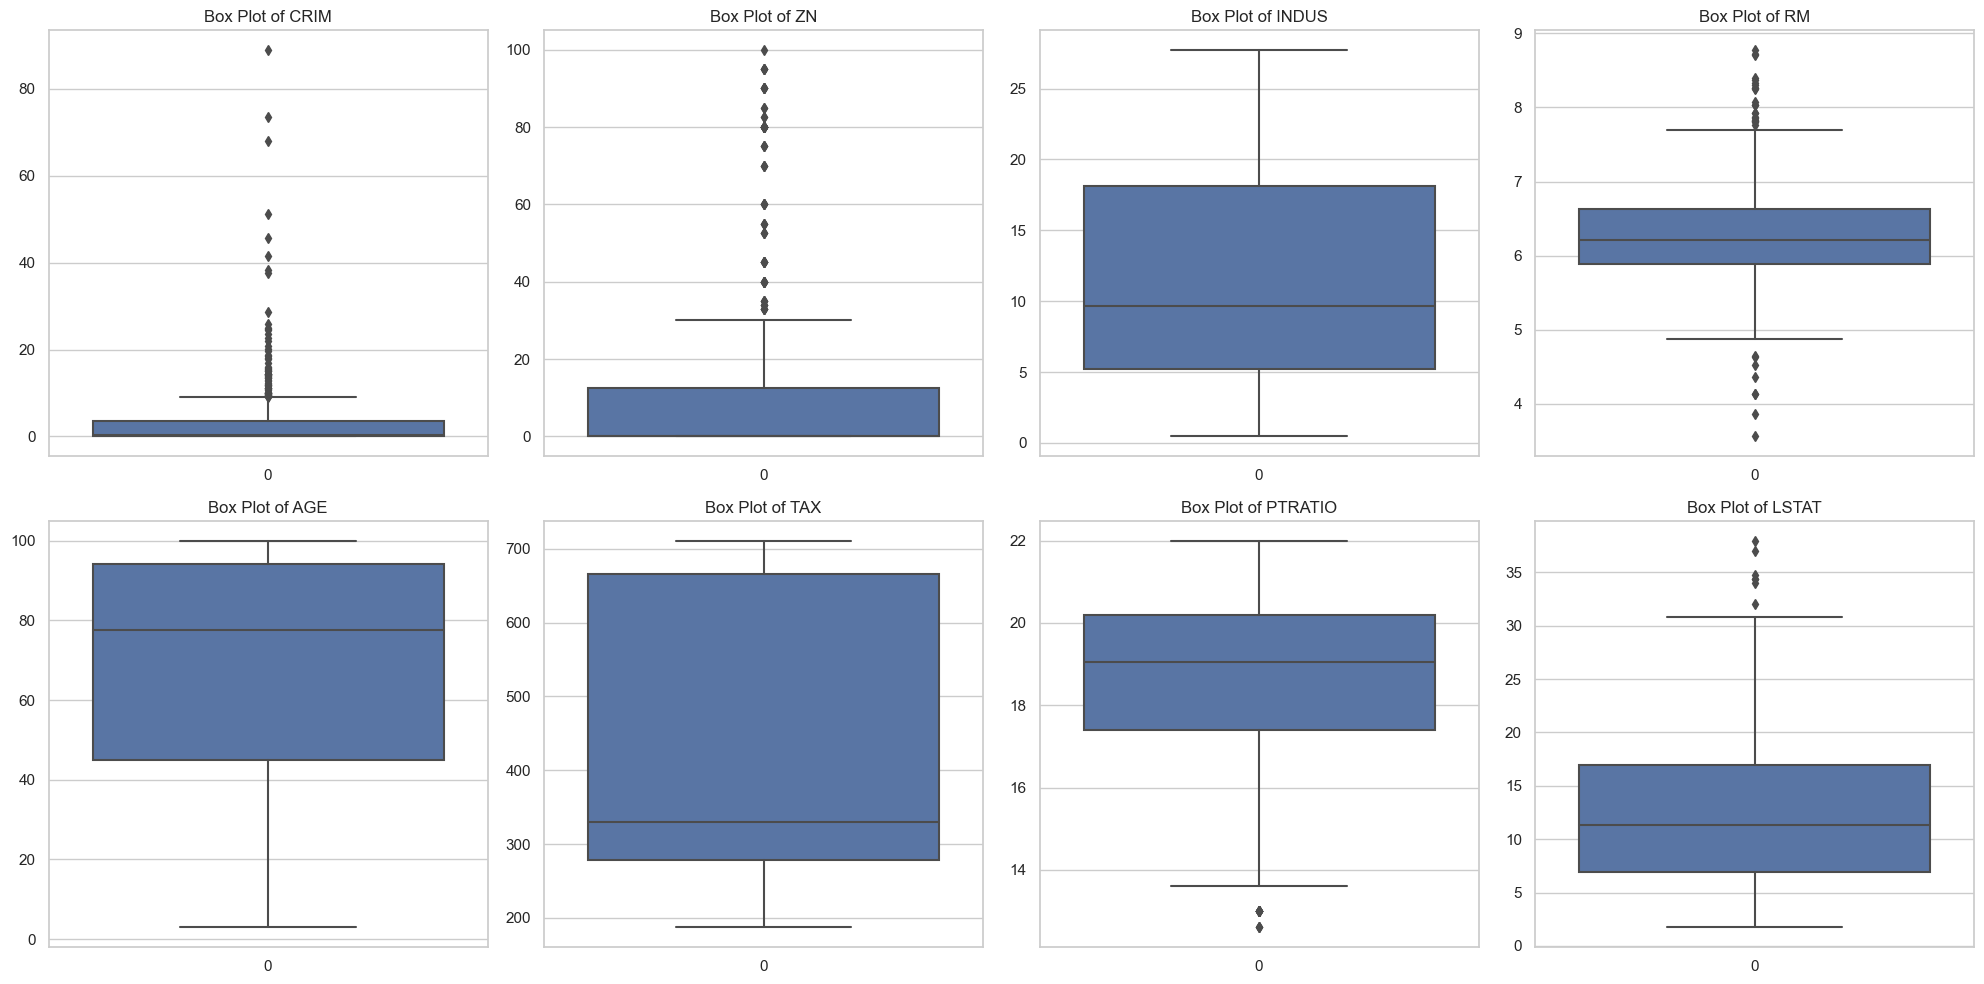

In [22]:
# Box plots to detect outliers in selected features
plt.figure(figsize=(20, 10))
selected_features = ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT']

for i, feature in enumerate(selected_features):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data=data[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


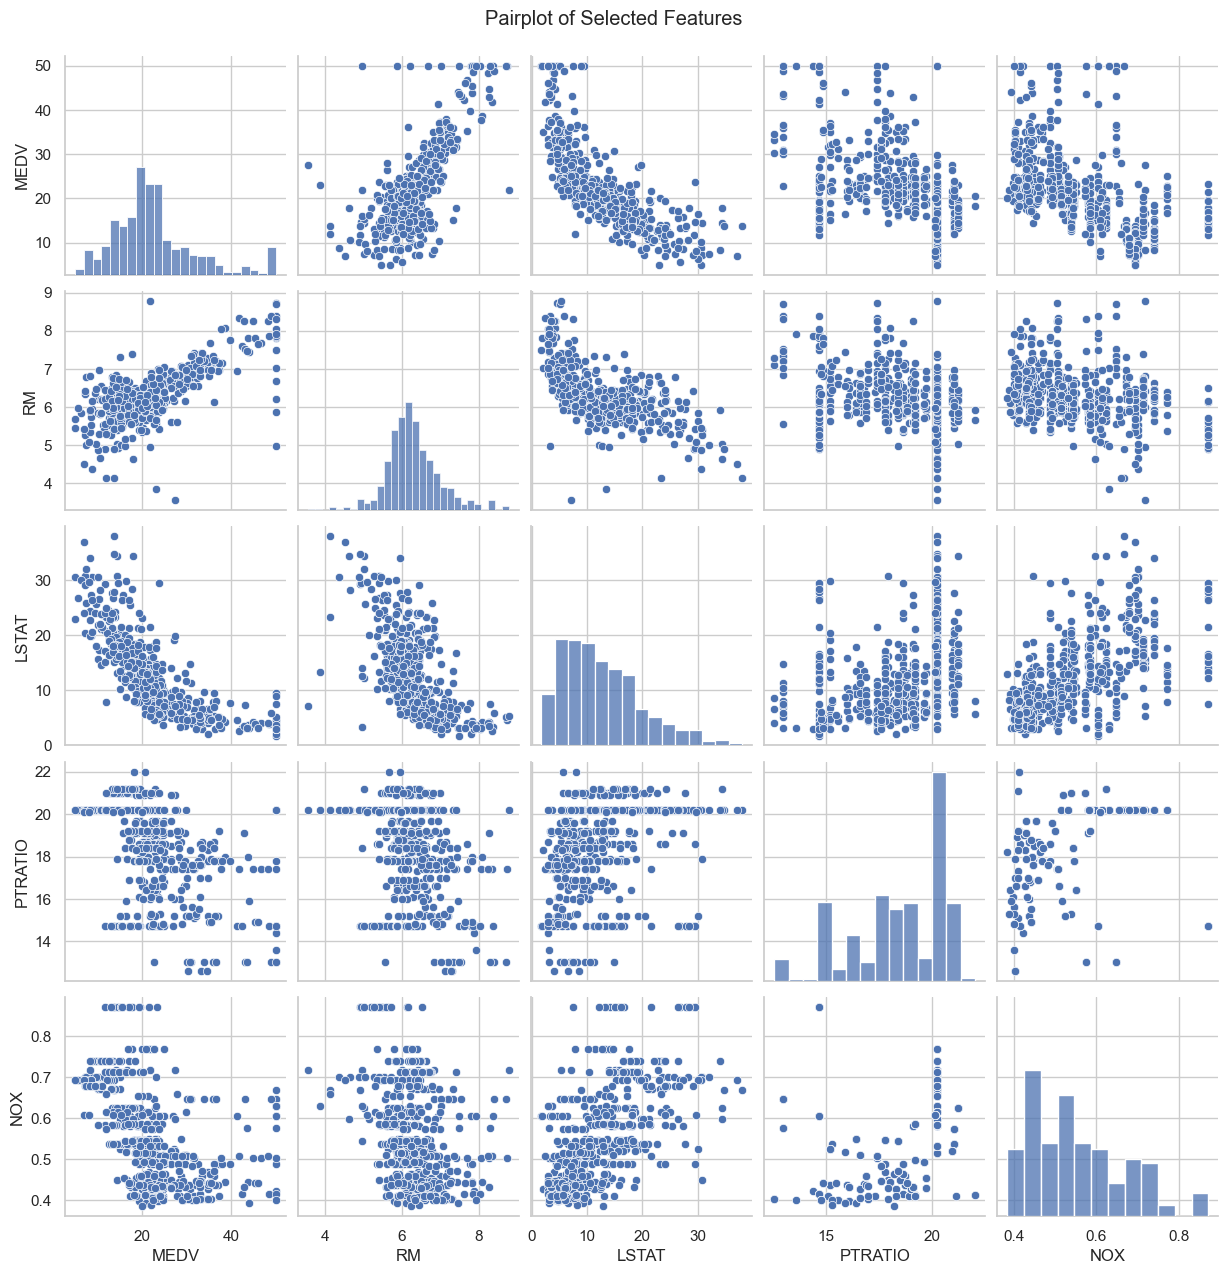

In [23]:
# Pairplot to visualize pairwise relationships between features and the target variable
sns.pairplot(data[['MEDV', 'RM', 'LSTAT', 'PTRATIO', 'NOX']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


# Feature Engineering

In [25]:
data['RM*LSTAT'] = data['RM'] * data['LSTAT']
data = pd.get_dummies(data, columns=['CHAS'], drop_first=True)

In [26]:
# Separating features and target variable
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Standardizing numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled data back to DataFrame for easier handling
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Checking the first few rows of the scaled data
print("\nScaled Features:")
print(X_scaled.head())



Scaled Features:
       CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
0 -0.419782  0.284830 -1.287909 -0.144217  0.413672 -0.120013  0.140214   
1 -0.417339 -0.487722 -0.593381 -0.740262  0.194274  0.367166  0.557160   
2 -0.417342 -0.487722 -0.593381 -0.740262  1.282714 -0.265812  0.557160   
3 -0.416750 -0.487722 -1.306878 -0.835284  1.016303 -0.809889  1.077737   
4 -0.412482 -0.487722 -1.306878 -0.835284  1.228577 -0.511180  1.077737   

        RAD       TAX   PTRATIO         B     LSTAT  RM*LSTAT    CHAS_1  
0 -0.982843 -0.666608 -1.459000  0.441052 -1.075562 -1.135832 -0.272599  
1 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.461537 -0.272599  
2 -0.867883 -0.987329 -0.303094  0.396427 -1.208727 -1.234280 -0.272599  
3 -0.752922 -1.106115  0.113032  0.416163 -1.361517 -1.452113 -0.272599  
4 -0.752922 -1.106115  0.113032  0.441052 -1.026501 -0.996785 -0.272599  


#  Model Training and Evaluation

In [28]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"R²: {r2_score(y_test, y_pred):.2f}")


Linear Regression Performance:
RMSE: 4.05
MAE: 2.56
R²: 0.78

Random Forest Performance:
RMSE: 2.83
MAE: 2.02
R²: 0.89


In [29]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearch
print("\nBest parameters found by GridSearch:")
print(grid_search.best_params_)


Best parameters found by GridSearch:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


# Model Interpretation and Reporting

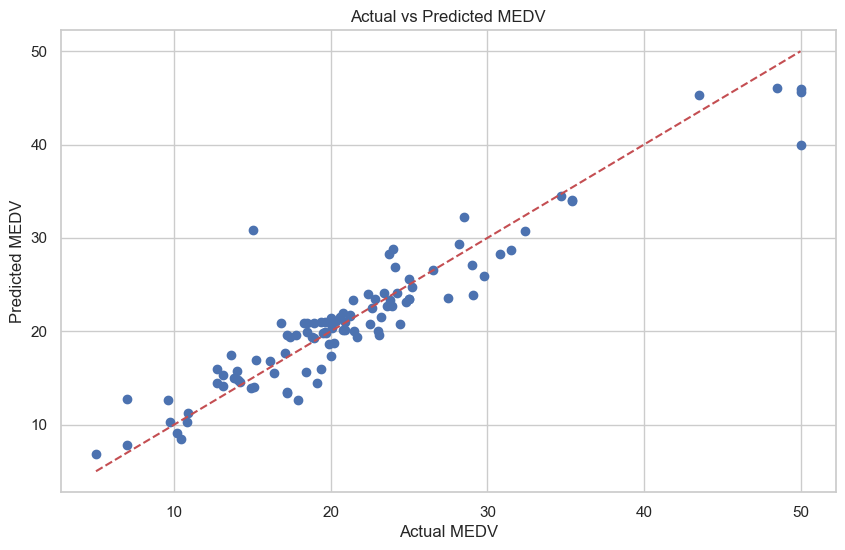

In [30]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted MEDV')
plt.show()